Kendi bulduğunuz bir veri setiyle "sınıflandırma" modeli geliştirilecek ve değerlendirilecektir.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("loan_data.csv")
df  # İkili sınıflandırma için kullanabileceğim bir veri seti bulamadığım için kendim mantıklı bir veri seti oluşturmaya çalışacağım.

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
df.isnull().sum() # Nan alan kontrolü.

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df.info()  # Veri sütunlarının tür sorgulaması.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df = df.drop(["person_age","person_gender","person_education","person_emp_exp","loan_amnt","loan_intent"], axis=1)
df  # Kategorik alanları siliyorum.

,person_income,person_home_ownership,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,71948.0,RENT,16.02,0.49,3.0,561,No,1
1,12282.0,OWN,11.14,0.08,2.0,504,Yes,0
2,12438.0,MORTGAGE,12.87,0.44,3.0,635,No,1
3,79753.0,RENT,15.23,0.44,2.0,675,No,1
4,66135.0,RENT,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...
44995,47971.0,RENT,15.66,0.31,3.0,645,No,1
44996,65800.0,RENT,14.07,0.14,11.0,621,No,1
44997,56942.0,RENT,10.02,0.05,10.0,668,No,1
44998,33164.0,RENT,13.23,0.36,6.0,604,No,1


In [ ]:
df = df.drop(["loan_int_rate","loan_percent_income","cb_person_cred_hist_length","credit_score","previous_loan_defaults_on_file"], axis=1)
df  # "loan_status"u hedef alan olrak seçtim.

,person_income,person_home_ownership,loan_status
0,71948.0,RENT,1
1,12282.0,OWN,0
2,12438.0,MORTGAGE,1
3,79753.0,RENT,1
4,66135.0,RENT,1
...,...,...,...
44995,47971.0,RENT,1
44996,65800.0,RENT,1
44997,56942.0,RENT,1
44998,33164.0,RENT,1


Bu kısımda bir kişi kredi borcunu ödemiş mi, olası ödememe durumunda haciz işlemleri için bir güvence kontrolü yaptım ve kişilerin satın aldıkları ev - maaş durumlarını gözlemledim.

In [ ]:
df = pd.get_dummies(df,  dtype=int)
df  # Kategorik alanları sayısal veri türüne çeviriyorum.

,person_income,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,71948.0,1,0,0,0,1
1,12282.0,0,0,0,1,0
2,12438.0,1,1,0,0,0
3,79753.0,1,0,0,0,1
4,66135.0,1,0,0,0,1
...,...,...,...,...,...,...
44995,47971.0,1,0,0,0,1
44996,65800.0,1,0,0,0,1
44997,56942.0,1,0,0,0,1
44998,33164.0,1,0,0,0,1


In [ ]:
df.info()  # Elimizde hangi sütunlar var.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_income                   45000 non-null  float64
 1   loan_status                     45000 non-null  int64  
 2   person_home_ownership_MORTGAGE  45000 non-null  int64  
 3   person_home_ownership_OTHER     45000 non-null  int64  
 4   person_home_ownership_OWN       45000 non-null  int64  
 5   person_home_ownership_RENT      45000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 2.1 MB


In [ ]:
df = df.drop(["person_home_ownership_MORTGAGE","person_home_ownership_OTHER","person_home_ownership_RENT"], axis=1)
df  # Belirlediğim amaç doğrultusunda gereksiz verileri siliyorum.

,person_income,loan_status,person_home_ownership_OWN
0,71948.0,1,0
1,12282.0,0,1
2,12438.0,1,0
3,79753.0,1,0
4,66135.0,1,0
...,...,...,...
44995,47971.0,1,0
44996,65800.0,1,0
44997,56942.0,1,0
44998,33164.0,1,0


In [ ]:
df.describe().T  # Keşifsel veri aanlizine başlıyoruz.

,count,mean,std,min,25%,50%,75%,max
person_income,45000.0,80319.053222,80422.498632,8000.0,47204.0,67048.0,95789.25,7200766.0
loan_status,45000.0,0.222222,0.415744,0.0,0.0,0.0,0.00,1.0
person_home_ownership_OWN,45000.0,0.065578,0.247545,0.0,0.0,0.0,0.00,1.0


In [ ]:
df["loan_status"].value_counts()  # Hedef alanın sayısal değerlerini sorguladık.

,count
loan_status,
0,35000
1,10000


<Axes: xlabel='loan_status', ylabel='count'>

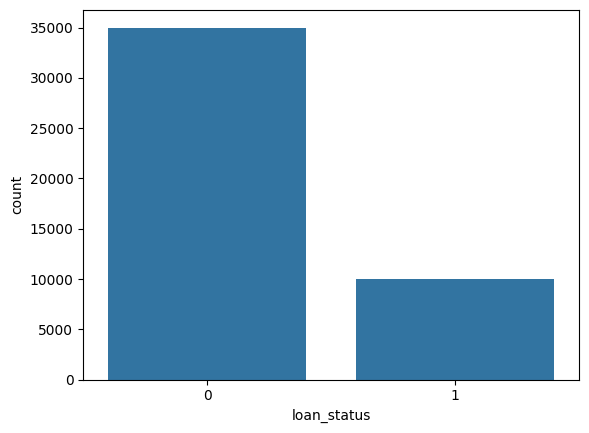

In [ ]:
sns.countplot(data=df,x="loan_status")

<Axes: xlabel='loan_status', ylabel='person_income'>

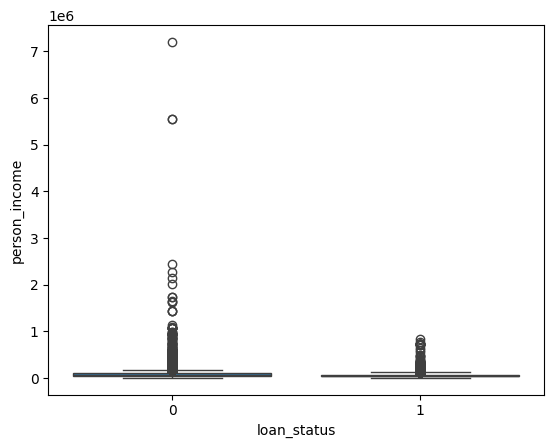

In [ ]:
sns.boxplot(x="loan_status",y="person_income",data=df)  # Veriyi anlamaya çalışıyoruz.

<Axes: xlabel='loan_status', ylabel='person_home_ownership_OWN'>

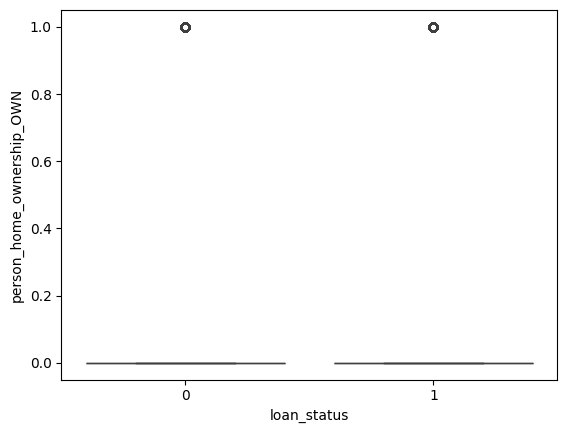

In [ ]:
sns.boxplot(x="loan_status",y="person_home_ownership_OWN",data=df)

<Axes: xlabel='person_home_ownership_OWN', ylabel='person_income'>

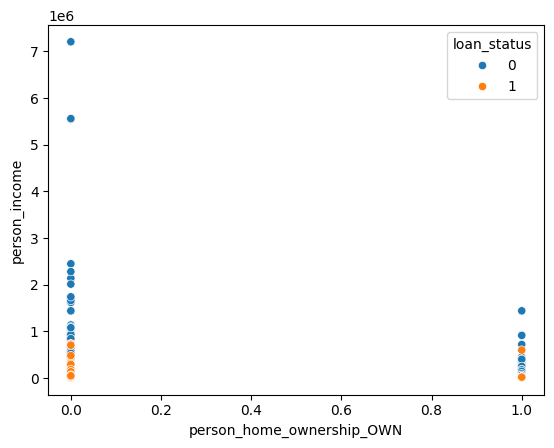

In [ ]:
sns.scatterplot(x="person_home_ownership_OWN",y="person_income",data=df,hue="loan_status")  # Dikkatimizi çeken outlier veriler var.

In [ ]:
df[(df["person_income"]>5000000) & (df["person_home_ownership_OWN"]==0) ]

,person_income,loan_status,person_home_ownership_OWN
32297,7200766.0,0,0
37930,5545545.0,0,0
38113,5556399.0,0,0


In [ ]:
df[(df["person_income"]>5000000) & (df["loan_status"]==0) ]  # Çift aşamalı outlier veri tespiti.

,person_income,loan_status,person_home_ownership_OWN
32297,7200766.0,0,0
37930,5545545.0,0,0
38113,5556399.0,0,0


In [ ]:
ind_drop=df[(df["person_income"]>5000000) & (df["loan_status"]==0) ].index # Belirlediğimiz verilerin index'lerini değişkene atıyoruz.

In [ ]:
df = df.drop(ind_drop,axis=0) # Değişkene atadığımız index'teki verileri satır bazında sildik.

<Axes: xlabel='person_home_ownership_OWN', ylabel='person_income'>

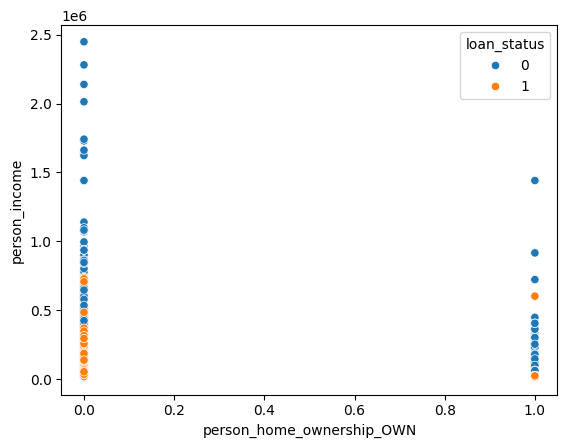

In [ ]:
sns.scatterplot(x="person_home_ownership_OWN",y="person_income",data=df,hue="loan_status") # Grafiğimiz daha normal.

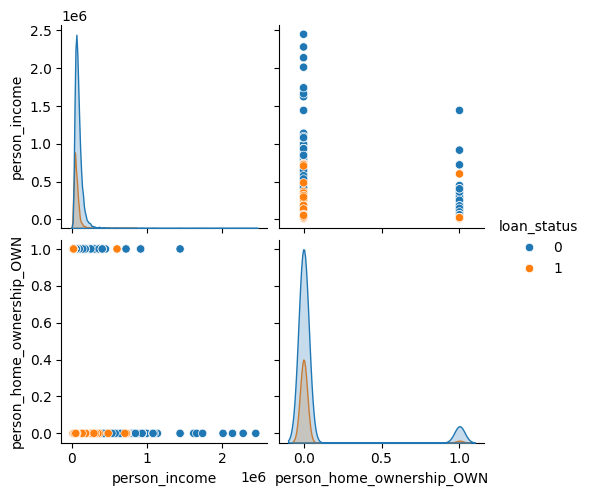

In [ ]:
sns.pairplot(df,hue="loan_status")

In [ ]:
X = df.drop("loan_status",axis=1)  # Özellik alanları
y = df["loan_status"]  # Hedef alan

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler   # Ölçeklendirme kütüphanesi tanımladık.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56) # Verini %30'unu test için ayırdık.

In [ ]:
scaler = StandardScaler()  # Ölçeklendirmeyi bir değişkene atadık.

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)  # Ölçeklendirilmiş verileri eğitim ve test olarak değişkenlere atadık.

In [ ]:
from sklearn.linear_model import LogisticRegression  # Lojistik regresyon kütüphanesini tanımladık.

In [ ]:
log_model = LogisticRegression()  # Bunu bir nesneye, modele atıyoruz.

In [ ]:
log_model.fit(scaled_X_train,y_train)  # Modeli eğittik.

LogisticRegression()

In [ ]:
log_model.coef_  # 2 özellik olduğu için 2 katsayı var.

array([[-1.1830855 , -0.37702527]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay # Sınıflandırma algoritma metrikleri

In [ ]:
y_pred = log_model.predict(scaled_X_test)  # Ölçeklendirilmiş test verilerine göre modele tahmin yaptırdık.

In [ ]:
y_pred  # Modelin yaptığı tahminler.

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(y_test)  # Y için gerçek değerler yukarıdaki tahminler.

16262    0
12651    0
17055    0
36928    0
38273    0
        ..
38452    0
2862     0
42581    1
3389     0
10786    1
Name: loan_status, Length: 13500, dtype: int64


In [ ]:
accuracy_score(y_test,y_pred)  # Yukaridaki gerçek değer ve tahmin değerlerinin doğruluk oranı. 1 tam puan

0.7767407407407407

In [ ]:
confusion_matrix(y_test,y_pred)  # 10486 doğru, 3014 yanlış tahmin var.

array([[10486,     0],
       [ 3014,     0]])

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test,y_pred))
 # Accuracy(doğruluk) %78 ayrıca diğer metrikler dengeli değil(precision ve recall arasında çok fark var) ve dağılım dengesiz.

              precision    recall  f1-score   support

           0       0.78      1.00      0.87     10486
           1       0.00      0.00      0.00      3014

    accuracy                           0.78     13500
   macro avg       0.39      0.50      0.44     13500
weighted avg       0.60      0.78      0.68     13500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
fpr, tpr,esik = metrics.roc_curve(y_test,y_pred)  # roc metriği bu 3 değeri döndürür."roc_curve" Alıcı Operatör Karakteristik Eğrisi, demek.


In [ ]:
fpr  # False positive değerleri

array([0., 1.])

In [ ]:
tpr  # True positive değerleri

array([0., 1.])

In [ ]:
esik  # Eşik değerleri

array([inf,  0.])

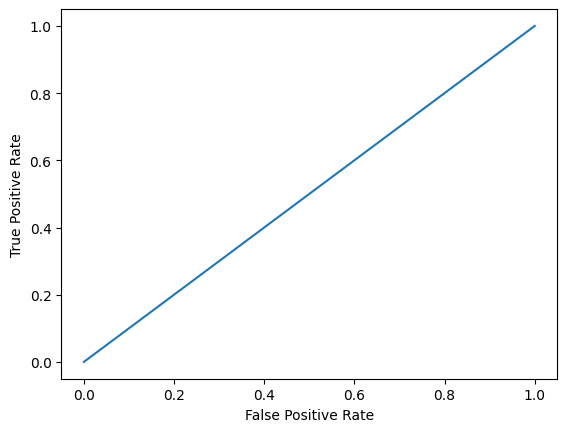

In [ ]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# Eğrinin altında kalan alan arttıkça veri iyidir diyebiliriz.
# Ama biz bu grafikten anlıyoruz ki veri setimiz aslında sınıflandırmaya uygun değil ve kötü bir veri seti.